# Histogramas de densidades en el halo de materia oscuro

Importar librerias

```{notebook}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
import numpy as np
# import seaborn as sns

 Funcion para graficar  la densidad de las posiciones de los halos individuales  </p>



In [2]:
def cartessian_projection(pos, figname):
   fig, ax = plt.subplots(1, 2, figsize=(10,4))
   ax[0].hist2d(pos['x[kpc]'], pos['y[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm())
   ax[1].hist2d(pos['x[kpc]'], pos['z[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm())
   ax[0].set_xlabel("x[kpc]")
   ax[0].set_ylabel("y[kpc]")
   ax[1].set_xlabel("x[kpc]")
   ax[1].set_ylabel("z[kpc]") 
   plt.savefig(figname, bbox_inches='tight')


   plt.close()
   return 0


def cartessian_projection2(pos,pos2, figname):
   fig, ax = plt.subplots(1, 2, figsize=(10,4))
   
   ax[0].hist2d(pos2['x[kpc]'], pos2['y[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm(), cmap = 'inferno')
   ax[0].hist2d(pos['x[kpc]'], pos['y[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm(), cmap='plasma' )
   ax[1].hist2d(pos2['x[kpc]'], pos2['z[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm())
   ax[1].hist2d(pos['x[kpc]'], pos['z[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm(),cmap='plasma')

   ax[0].set_xlabel("x[kpc]")
   ax[0].set_ylabel("y[kpc]")
   ax[1].set_xlabel("x[kpc]")
   ax[1].set_ylabel("z[kpc]") 
   plt.savefig(figname, bbox_inches='tight')


   plt.close()
   return 0


## Lectura de datos

In [3]:
reference = pd.read_csv('../data/raw_halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")
perturbed = pd.read_csv('../data/halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")

df = pd.DataFrame(reference)
df2 = pd.DataFrame(perturbed)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_halo.txt'

<p> Uso de la funcion 'cartesian_projection' para graficar </p>


In [13]:
cartessian_projection(df, "Halo_no_pertubado")
cartessian_projection(df2, "Halo_pertubado")
# cartessian_projection(df.div(df2), 'comparacion1_2')
# cartessian_projection(df2.div(df), 'comparacion2_1')
# cartessian_projection(df2.rsub(df), 'comparacion_resta2_1')
# cartessian_projection_1d(df, "d1hist")
#cartessian_projection2(df,df2, "comparacion");

0

<p> Calculo de los histogramas haciendo uso de la funcion 'histogram2d' de la libreria Numpy </p>

In [14]:

density1 = np.histogram2d(df['x[kpc]'], df['y[kpc]'],  bins=np.linspace(-100,100,800) )
# print(density1)
density2 = np.histogram2d(df2['x[kpc]'], df2['y[kpc]'],  bins=np.linspace(-100,100,800))
# print("Density background halo","\n", density1[0],"\n", "Density halo movement","\n", density2[0])

# print(density1[0].shape)
# print(density2[0].shape)

<p>Division de las primeras columnas de cada matriz densidad. </p>

nparticles first element 
 1.0 dimension (799, 799)
Density Shape (799, 799)
density 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.79919900e-05 ... 0.00000000e+00
  0.00000000e+00 1.54725658e-01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.79919900e-05]
 [0.00000000e+00 0.00000000e+00 2.79919900e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.59839800e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


AttributeError: 'AxesImage' object has no property 'bmin'

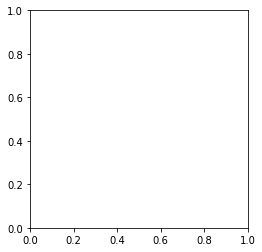

In [25]:
nparticles = density1[0]
nparticles2 = density2[0]

#avoiding the division by zero
for i in range(len(nparticles)):
    for j in range(len(nparticles[i])):
        if nparticles[i][j] == 0:
            nparticles[i][j] = 1

print("nparticles first element", "\n", nparticles[56][300], "dimension", nparticles.shape)
density = np.divide(nparticles2,nparticles)
print("Density Shape", density.shape)

print("density", "\n",density)
def cartessian_projection3(pos, figname):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].hist2d(pos[:,0], pos[:,1],  bins=np.linspace(-100,100,800), norm=LogNorm())
    ax[1].hist2d(pos[:,0], pos[:,2],  bins=np.linspace(-100,100,800), norm=LogNorm())
    ax[0].set_xlabel("x[kpc]")
    ax[0].set_ylabel("y[kpc]")
    ax[1].set_xlabel("x[kpc]")
    ax[1].set_ylabel("z[kpc]") 
    plt.savefig(figname, bbox_inches='tight')
    plt.close()
    return 0

def cartessian_projection3 (density, figname ):
    fig, ax = plt.subplots(1, 1, figsize=(10,4))
    im = ax.imshow(density,bmin = -0.5, bmax=0.5)
    plt.colorbar(im)
    # ax.set_xlabel
    # ax.set_ylabel("y[kpc]")
    plt.savefig(figname, bbox_inches='tight')
    plt.close()
    return 0

# cartessian_projection3(density, "density_halo")
cartessian_projection3(nparticles/nparticles2 -1, "division")

In [11]:


# def densities(pos):
#     np.histogram2d(pos['x[kpc]'], pos['y[kpc]'],  bins=np.linspace(-100,100,800), normed=LogNorm() )
#     return 0
# def cartessian_projection_1d(pos, figname):
#    fig, ax = plt.subplots(1, 2, figsize=(10,4))
#    ax[0].hist(pos['x[kpc]'],  bins=np.linspace(-100,100,800))
#    ax[1].hist(pos['y[kpc]'],  bins=np.linspace(-100,100,800))
#    #ax[1].hist2d(pos['x[kpc]'], pos['z[kpc]'],  bins=np.linspace(-100,100,800), norm=LogNorm())
#    ax[0].set_xlabel("x[kpc]")
#    ax[0].set_ylabel("y[kpc]")
#    ax[1].set_xlabel("x[kpc]")
#    ax[1].set_ylabel("z[kpc]") 
#    plt.savefig(figname, bbox_inches='tight')
   

#    plt.close()
#    return 0

# reference = pd.read_csv('../data/raw_halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")
# perturbed = pd.read_csv('../data/halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")

# df = pd.DataFrame(reference)
# df2 = pd.DataFrame(perturbed)


# cartessian_projection(df, "Halo_no_pertubado")
# cartessian_projection(df2, "Halo_pertubado")
# cartessian_projection(df.div(df2), 'comparacion1_2')
# cartessian_projection(df2.div(df), 'comparacion2_1')
# cartessian_projection(df2.rsub(df), 'comparacion_resta2_1')
# cartessian_projection_1d(df, "d1hist")
# #cartessian_projection2(df,df2, "comparacion");


# def cartessian_projection3(pos, figname):
#    fig, ax = plt.subplots(1, 2, figsize=(10,4))
#    ax[0].hist2d(pos[:,0], pos[:,1],  bins=np.linspace(-100,100,800), norm=LogNorm())
#    ax[1].hist2d(pos[:,0], pos[:,2],  bins=np.linspace(-100,100,800), norm=LogNorm())
#    ax[0].set_xlabel("x[kpc]")
#    ax[0].set_ylabel("y[kpc]")
#    ax[1].set_xlabel("x[kpc]")
#    ax[1].set_ylabel("z[kpc]") 
#    plt.savefig(figname, bbox_inches='tight')
#    plt.close()
#    return 0



In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from google.colab import files


# reference = pd.read_csv('raw_halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")
# perturbed = pd.read_csv('halo.txt', names=["x[kpc]","y[kpc]","z[kpc]","vx[km/s]","vy[km/s]","vz[km/s]"], sep=" ")

# df = pd.DataFrame(reference)
# df2 = pd.DataFrame(perturbed)

# plt.subplot(1, 2, 1)
# plt.scatter(df['x[kpc]'], df['vx[km/s]'], marker='o', s=0.01)
# plt.axis('equal')

# plt.subplot(1, 2, 2)
# plt.scatter(df2['x[kpc]'], df2['vx[km/s]'], marker='o', s=0.01)
# plt.axis('equal')
# # ax.grid()


# fig1 = plt.gcf()
# plt.show() 
# plt.draw()
# fig1.savefig('save2.png')

# # data.plot(x='x[kpc]', y='y[kpc]', style="o")
# #print(df)
# #print(df2)